### Business Case:-To find out based on given features whether the loan will get approved or not

## Python Implementation

In [1]:
##importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## loading the data
data=pd.read_csv('loan_approved.csv')

In [3]:
## Getting the first few rows of data
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Basic Checks

In [4]:
# Quick summary of data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# Statistical information of the data
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
data.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status (Approved)
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


## Data Preprocessing

In [7]:
## Checking missing valuea

data.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [8]:
data.shape

(614, 13)

In [9]:
## Getting the rows where values are missed in Gender features
data.loc[data['Gender'].isnull()==True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [10]:
## Checking the distribution along the both labels
data.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [11]:
## How much values have been missed
data.Gender.isnull().sum()/len(data)*100

2.1172638436482085

In [12]:
## Imputing the missing values with mode
data.loc[data['Gender'].isnull()==True,'Gender']='Male'

In [13]:
data.Gender.isnull().sum()

0

In [14]:
## Getting the values in Dependents
data.loc[data['Dependents'].isnull()==True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [15]:
data.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [16]:
##. creating new label unknown as there seems no clear  relationship  between 'Dependents' and target variable
data.loc[data['Dependents'].isnull()==True,'Dependents']='3+'

In [17]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [18]:
## For married feature
data.loc[data['Married'].isnull()==True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
104,LP001357,Male,NaN,3+,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,3+,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,3+,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [19]:
## getting the counts
data.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [20]:
## Imputing with yes
data.loc[data['Married'].isnull()==True,'Married']='Yes'

In [21]:
## Checking Self_Employed
len(data.loc[data['Self_Employed'].isnull()==True])

32

In [22]:
data.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

<Axes: xlabel='Self_Employed', ylabel='count'>

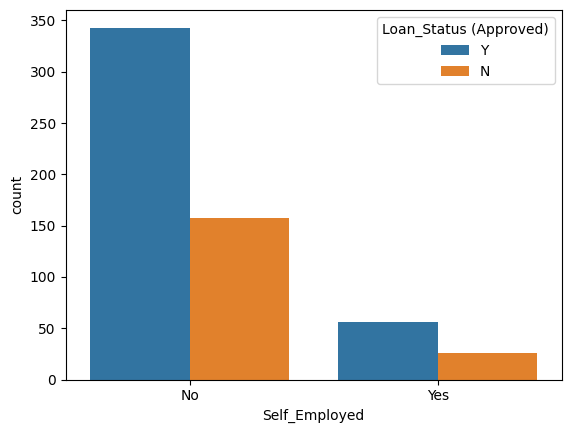

In [23]:
sns.countplot(x='Self_Employed',data=data,hue='Loan_Status (Approved)')

In [24]:
# Replace the nan values with mode
data.loc[data['Self_Employed'].isnull()==True,'Self_Employed']='No'

In [25]:
# check for null values
data.isnull().sum()

Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

<Axes: >

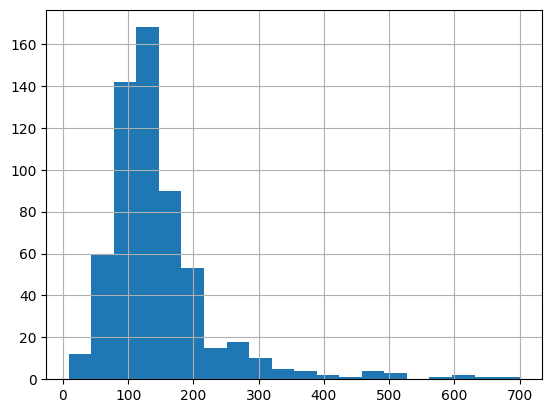

In [26]:
## Histogram since it has numerical value
data.LoanAmount.hist(bins=20)

Since data is skewed, we can use median to replace the nan value. It is recommended to use mean only for symmetric data distribution.

In [27]:
# Check median for LoanAmount column
np.median(data.LoanAmount.dropna(axis=0))

128.0

In [28]:
# Check median for LoanAmount column
np.median(data.LoanAmount)

nan

In [29]:
# Replace the nan values in LoanAmount column with median value
data.loc[data['LoanAmount'].isnull()==True,'LoanAmount']=np.median(data.LoanAmount.dropna(axis=0))

In [30]:
data.LoanAmount.isnull().sum()

0

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

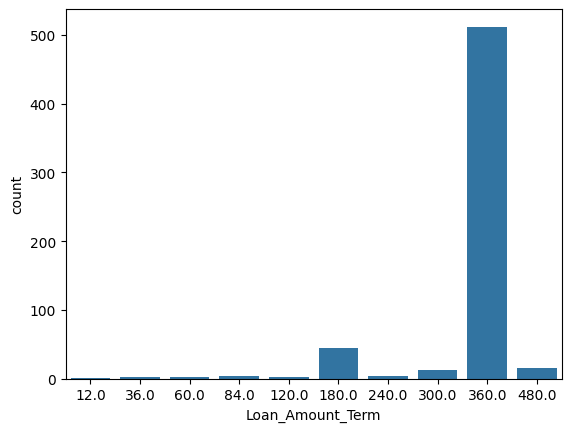

In [31]:
sns.countplot(x='Loan_Amount_Term',data=data)

<Axes: >

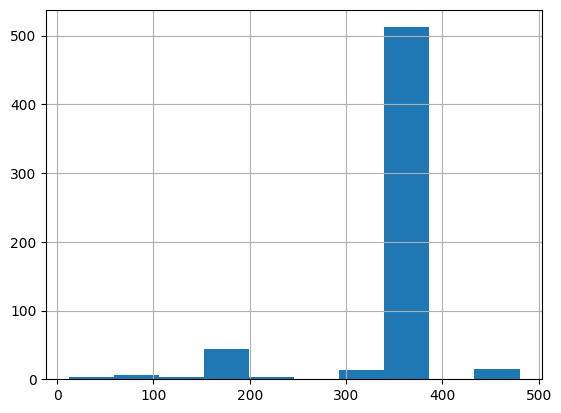

In [32]:
data.Loan_Amount_Term.hist()

In [33]:
data.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [34]:
np.median(data.Loan_Amount_Term.dropna(axis=0))

360.0

In [35]:
# replace the nan values in Loan_Amount_Term with the median value
data.loc[data['Loan_Amount_Term'].isnull()==True,'Loan_Amount_Term']=np.median(data.Loan_Amount_Term.dropna(axis=0))

In [36]:
data.Loan_Amount_Term.isnull().sum()

0

In [37]:
# Credit_History
data.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

<Axes: xlabel='Credit_History', ylabel='count'>

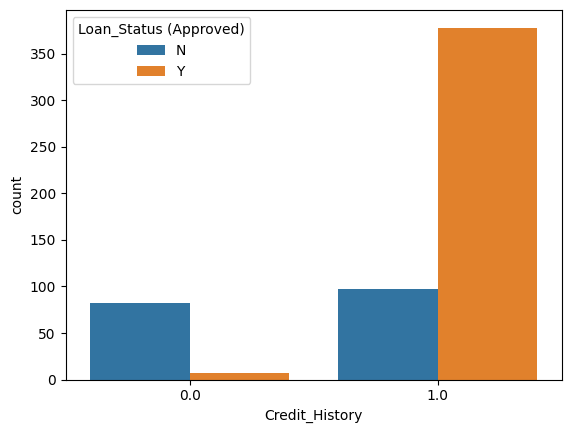

In [38]:
sns.countplot(x='Credit_History',data=data,hue='Loan_Status (Approved)')

<Axes: xlabel='Credit_History', ylabel='count'>

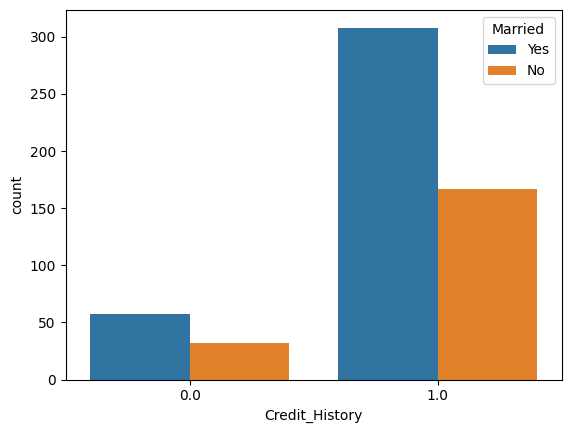

In [39]:
sns.countplot(x='Credit_History',data=data,hue='Married')

In [40]:
data.loc[data['Credit_History'].isnull()==True,'Credit_History']=1.0

In [41]:
data.isnull().sum()

Loan_ID                   0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status (Approved)    0
dtype: int64

In [42]:
## Step 2 Handling the categorical data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  614 non-null    object 
 2   Married                 614 non-null    object 
 3   Dependents              614 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           614 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              614 non-null    float64
 9   Loan_Amount_Term        614 non-null    float64
 10  Credit_History          614 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [43]:
## renaming the target column
data.rename(columns={"Loan_Status (Approved)":'Loan_Status'},inplace=True)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [45]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

#data.Self_Employed=lc.fit_transform(data.Self_Employed)
#data.Dependents=lc.fit_transform(data.Dependents)

### Converting categorical variables to numerical

In [46]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [47]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [48]:
# Convenient method to replace original categorical columns with dummy variables

data = pd.get_dummies(data=data, columns=['Gender','Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area', 'Loan_Status'], drop_first=True)


In [49]:
data

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001002,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,LP001003,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,LP001006,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,LP001008,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,LP002979,4106,0.0,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,LP002983,8072,240.0,253.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,LP002984,7583,0.0,187.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1


In [50]:
# Scaling is preferably applied only to continuous variables
data.columns

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y'],
      dtype='object')

In [51]:
## scaling data
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]=scale.fit_transform(data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])

In [52]:
data.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001002,0.070489,0.000000,0.172214,0.74359,1.0,1,0,0,0,0,0,0,0,1,1
1,LP001003,0.054830,0.036192,0.172214,0.74359,1.0,1,1,1,0,0,0,0,0,0,0
2,LP001005,0.035250,0.000000,0.082489,0.74359,1.0,1,1,0,0,0,0,1,0,1,1
3,LP001006,0.030093,0.056592,0.160637,0.74359,1.0,1,1,0,0,0,1,0,0,1,1
4,LP001008,0.072356,0.000000,0.191027,0.74359,1.0,1,0,0,0,0,0,0,0,1,1


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   ApplicantIncome          614 non-null    float64
 2   CoapplicantIncome        614 non-null    float64
 3   LoanAmount               614 non-null    float64
 4   Loan_Amount_Term         614 non-null    float64
 5   Credit_History           614 non-null    float64
 6   Gender_Male              614 non-null    uint8  
 7   Married_Yes              614 non-null    uint8  
 8   Dependents_1             614 non-null    uint8  
 9   Dependents_2             614 non-null    uint8  
 10  Dependents_3+            614 non-null    uint8  
 11  Education_Not Graduate   614 non-null    uint8  
 12  Self_Employed_Yes        614 non-null    uint8  
 13  Property_Area_Semiurban  614 non-null    uint8  
 14  Property_Area_Urban      6

## Feature Selection

In [54]:
## checking correlation
corr_data=data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

<Axes: >

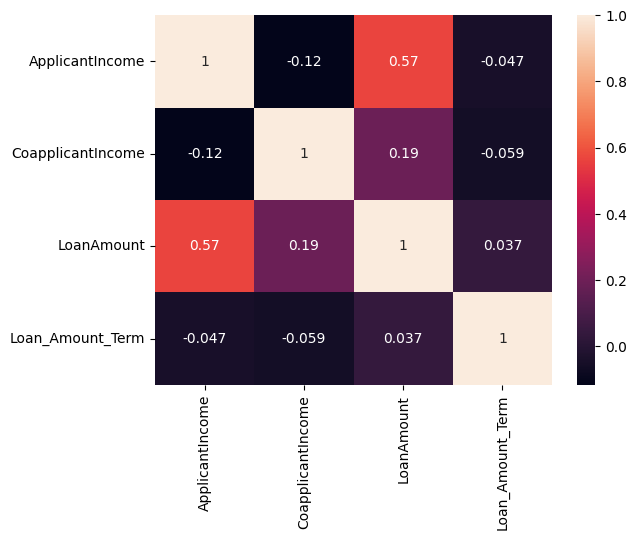

In [55]:
sns.heatmap(corr_data.corr(),annot=True)

In [56]:
## There is no relationship among the numerical data

In [57]:
corr_data.describe() ## no constant features

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,0.064978,0.038910,0.197905,0.706005
std,0.075560,0.070229,0.121718,0.137668
min,0.000000,0.000000,0.000000,0.000000
25%,0.033735,0.000000,0.132055,0.743590
50%,0.045300,0.028524,0.172214,0.743590
75%,0.069821,0.055134,0.225398,0.743590
max,1.000000,1.000000,1.000000,1.000000


In [58]:
## checking the duplicate rows

#data.duplicate()
data.duplicated().sum()

0

## Model Creation

In [59]:
## defining X and y

x = data.drop(['Loan_ID','Loan_Status_Y'] ,axis=1)
y = data['Loan_Status_Y']

In [60]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.070489,0.000000,0.172214,0.74359,1.0,1,0,0,0,0,0,0,0,1
1,0.054830,0.036192,0.172214,0.74359,1.0,1,1,1,0,0,0,0,0,0
2,0.035250,0.000000,0.082489,0.74359,1.0,1,1,0,0,0,0,1,0,1
3,0.030093,0.056592,0.160637,0.74359,1.0,1,1,0,0,0,1,0,0,1
4,0.072356,0.000000,0.191027,0.74359,1.0,1,0,0,0,0,0,0,0,1


In [61]:
x.shape , y.shape

((614, 14), (614,))

In [62]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_Y, Length: 614, dtype: uint8

In [63]:
## creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x, y,random_state=3)

In [64]:
## balancing the data
# !pip install imblearn
# !pip3...
# Install imblearn package - pip install imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [65]:
X_smote, y_smote = smote.fit_resample(X_train,y_train)

**Counter** is a container which keeps track to how many times equivalent values are added. Python counter class is a part of collections module and is a subclass of dictionary.

In [66]:
from collections import Counter
print("Actual Classes",Counter(y))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({1: 422, 0: 192})
SMOTE Classes Counter({1: 301, 0: 301})


In [67]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [68]:
from sklearn.svm import SVC

In [69]:
# Support Vector Classifier Model

from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_smote, y_smote)

SVC()

In [70]:
# Predict output for X_test

y_hat=svclassifier.predict(X_test)

In [71]:
## evaluating the model created
from sklearn.metrics import accuracy_score,classification_report,f1_score
acc=accuracy_score(y_test,y_hat)
acc

0.7402597402597403

In [72]:
# Calssification report measures the quality of predictions. True Positives, False Positives, True negatives and False Negatives
# are used to predict the metrics of a classification report

print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.41      0.45      0.43        33
           1       0.85      0.82      0.83       121

    accuracy                           0.74       154
   macro avg       0.63      0.64      0.63       154
weighted avg       0.75      0.74      0.75       154



In [73]:
cm1=pd.crosstab(y_test,y_hat)
cm1

col_0,0,1
Loan_Status_Y,,
0,15,18
1,22,99


In [74]:
# F1 score considers both Precision and Recall for evaluating a model
f1=f1_score(y_test,y_hat)
f1

0.8319327731092436

In [75]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svclassifier,x,y,cv=3,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good.

[0.87066246 0.86875    0.89032258]
Cross validation Score: 0.8765783470709948
Std : 0.009749951923361921


## Hyperparameters of Support Vector Machine

In [76]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

grid = GridSearchCV(SVC(random_state=42), param_grid, refit = True, verbose = 3,scoring='f1',cv=3)

# fitting the model for grid search
grid.fit(X_smote, y_smote)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END ....................C=0.1, gamma=1;, score=0.703 total time=   0.0s
[CV 2/3] END ....................C=0.1, gamma=1;, score=0.773 total time=   0.0s
[CV 3/3] END ....................C=0.1, gamma=1;, score=0.714 total time=   0.0s
[CV 1/3] END ..................C=0.1, gamma=0.1;, score=0.753 total time=   0.0s
[CV 2/3] END ..................C=0.1, gamma=0.1;, score=0.781 total time=   0.0s
[CV 3/3] END ..................C=0.1, gamma=0.1;, score=0.763 total time=   0.0s
[CV 1/3] END .................C=0.1, gamma=0.01;, score=0.000 total time=   0.0s
[CV 2/3] END .................C=0.1, gamma=0.01;, score=0.664 total time=   0.0s
[CV 3/3] END .................C=0.1, gamma=0.01;, score=0.763 total time=   0.0s
[CV 1/3] END ................C=0.1, gamma=0.001;, score=0.000 total time=   0.0s
[CV 2/3] END ................C=0.1, gamma=0.001;, score=0.664 total time=   0.1s
[CV 3/3] END ................C=0.1, gamma=0.001;

GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=3)

In [77]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.01}
SVC(C=1, gamma=0.01, random_state=42)


In [78]:
#clf=SVC(C=100, gamma=0.001,random_state=42) ##0.1
clf=SVC(C=1, gamma=0.01,random_state=42) ##0.1

In [79]:
clf.fit(X_smote, y_smote)

SVC(C=1, gamma=0.01, random_state=42)

In [80]:
y_clf=clf.predict(X_test)

In [81]:
print(classification_report(y_test,y_clf))

              precision    recall  f1-score   support

           0       0.81      0.39      0.53        33
           1       0.86      0.98      0.91       121

    accuracy                           0.85       154
   macro avg       0.83      0.68      0.72       154
weighted avg       0.85      0.85      0.83       154



In [82]:
cm=pd.crosstab(y_test,y_clf)
cm

col_0,0,1
Loan_Status_Y,,
0,13,20
1,3,118


In [83]:
f1=f1_score(y_test,y_clf)
f1

0.911196911196911

In [84]:
scores_after = cross_val_score(clf,x,y,cv=3,scoring='f1')
print(scores_after)
print("Cross validation Score:",scores_after.mean())
print("Std :",scores.std())
#std of < 0.05 is good.

[0.8597561  0.86875    0.81395349]
Cross validation Score: 0.8474865286443563
Std : 0.009749951923361921


___________ END ___________